In [11]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/grbpop/'
sys.path.insert(0, src_dir)
from GRB_population import GRBPopulation, create_GRB_population_from
import physics as ph
import numpy as np
import io_grb_pop as io
import miscellaneous as msc
from cosmology import init_cosmology, Lum_dist
from ECLAIRs import init_ECLAIRs
import plotting_functions as pf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import logging
import f90_functions as f90f

log = logging.getLogger(__name__)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG,
                    format='%(asctime)s.%(msecs)03d [%(levelname)s] %(message)s',
                    datefmt='%H:%M:%S')
logging.getLogger('matplotlib').setLevel(logging.WARNING)
plt.style.use('presentation')

In [2]:
paths_to_dir, paths_to_files = io.generate_paths()

11:11:27.787 [DEBUG] Root directory is /Users/palmerio/Science_projects/GRB_population_model
11:11:27.788 [DEBUG] Directory paths :
    'root'    : /Users/palmerio/Science_projects/GRB_population_model
    'obs'     : /Users/palmerio/Science_projects/GRB_population_model/observational_constraints
    'init'    : /Users/palmerio/Science_projects/GRB_population_model/init
    'output'  : /Users/palmerio/Science_projects/GRB_population_model/model_outputs
    'data'    : /Users/palmerio/Science_projects/GRB_population_model/data
    'cosmo'   : /Users/palmerio/Science_projects/GRB_population_model/data/cosmology
    'ECLAIRs' : /Users/palmerio/Science_projects/GRB_population_model/data/ECLAIRs
11:11:27.789 [DEBUG] File paths :
    'config'          : /Users/palmerio/Science_projects/GRB_population_model/init/config.yml
    'param'           : /Users/palmerio/Science_projects/GRB_population_model/init/parameters.yml
    'instrum'         : /Users/palmerio/Science_projects/GRB_population_mo

In [3]:
config, params, instruments, samples, obs_constraints = io.read_init_files(paths_to_files)
config['Nb_GRBs'] = '1e5'
config['samples'] = ['Stern', 'ECLAIRs']
config['constraints'] = ['Stern']
config['output_dir'] = 'debugger'
# paths_to_dir['output'] = paths_to_dir['output']/config['output_dir']
paths_to_dir['output']=Path('/Users/palmerio/Science_projects/GRB_population_model/model_outputs/debugger/')

11:11:27.822 [DEBUG] Input configuration:
Nb_GRBs: 1e5
constraints:
- Stern
- EpGBM
- eBAT6
output_dir: debugger
samples:
- Stern
- EpGBM
- eBAT6
- Swift
- ECLAIRs
- SHOALS
- GBM_sample
- BATSE_5B_sample

11:11:27.830 [DEBUG] Input parameters:
Cvar_distribution:
    correl_slope: -0.413
    mu: 0.04
    sigma: 0.22
luminosity_function:
    k_evol: 1.0
    logLbreak: 52.56
    logLmax: 53.0
    logLmin: 49.6989700043
    model: ES
    slope: 1.41
peak_energy_distribution:
    Ep0: 690
    alpha_amati: 0.3
    model: LN
    sigmaEp: 0.45
redshift_distribution:
    a: 0.94
    b: -0.52
    model: BExp
    zeta: null
    zm: 2.18
    zmax: 20
spectral_shape:
    alpha: 0.6
    beta: 2.5
    model: GBM_Band
t90obs_distribution:
    mu: 1.45
    sigma: 0.47



NameError: name 'Path' is not defined

In [4]:
cosmo = init_cosmology(paths_to_dir['cosmo'])
ECLAIRs_prop = init_ECLAIRs(ECLAIRs_dir=paths_to_dir['ECLAIRs'],
                            ECLAIRs_config=instruments['ECLAIRs'])
samples['ECLAIRs']['pflx_min'] = ECLAIRs_prop['bkg_total']

incl_samples, incl_instruments, incl_constraints = io.create_config(config=config,
                                                       samples=samples,
                                                       instruments=instruments,
                                                       obs_constraints=obs_constraints)

11:11:30.831 [DEBUG] Read cosmology from directory /Users/palmerio/Science_projects/GRB_population_model/data/cosmology: [0.3, 0.7, 0.7]
11:11:30.832 [DEBUG] ==============================================
11:11:30.833 [DEBUG] ===           ECLAIRs instrument           ===
11:11:30.833 [DEBUG] ==============================================
11:11:30.834 [DEBUG] ECLAIRs energy channel: 4.0 to 150.0 keV
11:11:30.835 [DEBUG] ECLAIRs detection level: 6.5 sigmas
11:11:30.865 [DEBUG] Effective area: from 1.013650e+02 cm2 at 4.00 keV
11:11:30.866 [DEBUG] Effective area: to   1.811580e+02 cm2 at 250.00 keV
11:11:30.867 [DEBUG] Background: from 2.819620e+02 cts/s/keV at 4.00 keV
11:11:30.869 [DEBUG] Background: to   8.730200e-02 cts/s/keV at 250.00 keV
11:11:30.869 [DEBUG] ECLAIRs background: 3.098396e+03 cts/s from 4.00 keV to 150.00 keV
11:11:30.871 [DEBUG] ==============================================
11:11:30.873 [INFO] Including samples: ['Stern', 'ECLAIRs']
11:11:30.875 [DEBUG] Including s

In [5]:
np.random.seed(12)
gp = create_GRB_population_from(Nb_GRBs=config['Nb_GRBs'],
                                cosmo=cosmo,
                                params=params,
                                incl_samples=incl_samples,
                                incl_instruments=incl_instruments,
                                incl_constraints=incl_constraints,
                                ECLAIRs_prop=ECLAIRs_prop,
                                output_dir=paths_to_dir['output'])


11:11:33.768 [INFO] Starting calculations of peak photon fluxes...
11:11:33.768 [DEBUG] For BATSE instrument [50, 300 keV]:
11:11:35.003 [DEBUG] Done in 1.234 s
11:11:35.045 [INFO] Starting calculations of peak photon fluxes...
11:11:35.046 [DEBUG] For ECLAIRs instrument [4.0, 150.0 keV]:
11:11:36.993 [DEBUG] Done in 1.946 s
11:11:36.994 [INFO] Starting calculations of peak energy fluxes...
11:11:36.994 [DEBUG] For BATSE instrument [50.0, 300.0 keV]:
11:11:38.028 [DEBUG] Done in 1.033 s
11:11:38.028 [DEBUG] For ECLAIRs instrument [4.0, 150.0 keV]:
11:11:40.059 [DEBUG] Done in 2.030 s
11:11:40.060 [DEBUG] Starting calculations of photon fluences...
11:11:40.070 [DEBUG] Done in 0.009 s
11:11:40.070 [DEBUG] Starting calculations of energy fluences...
11:11:40.077 [DEBUG] Done in 0.006 s
11:11:40.078 [INFO] Starting calculations of detection probability...
11:11:40.079 [DEBUG] Stern sample:
11:11:40.083 [DEBUG] Done in 0.003 s
11:11:40.084 [DEBUG] ECLAIRs sample:
11:11:47.102 [DEBUG] Done 

In [7]:
sky_corr = 1.83/ECLAIRs_prop['omega_ECLAIRs_tot']
frac_T_live_ECLAIRs = 0.53  #  T_live / T_mission
ECLAIRs_tot_rate = np.sum(gp.properties['pdet_ECLAIRs_tot'])* frac_T_live_ECLAIRs / gp.normalization['T_sim'] * sky_corr
print('ECLAIRs total rate: {} GRB/yr'.format(ECLAIRs_tot_rate))

ECLAIRs total rate: 23.623935921019676 GRB/yr


In [29]:
gp.properties

,z,D_L,L,Ep,alpha,beta,ktild,Epobs,pht_pflx_BATSE,t90,...,erg_pflx_BATSE,erg_cts_ECLAIRs,pht_flnc_BATSE,pht_flnc_ECLAIRs,erg_flnc_BATSE,erg_flnc_ECLAIRs,pdet_Stern,pdet_ECLAIRs_tot,pdet_ECLAIRs_pht_flnc,pdet_ECLAIRs_pht_cts
0,1.432,10391.248459,1.532278e+50,269.700917,0.883468,2.75087,0.954909,110.896759,0.034102,84.331929,...,5.747455e-09,2.411966e-06,1.688369,2361.373636,2.845557e-07,0.000119,0.0,0.000000,0.0,0.000000
1,3.170,27630.627622,3.344103e+50,211.470520,1.057890,2.49724,0.637547,50.712355,0.007777,6.495532,...,1.199519e-09,8.245345e-07,0.045259,130.741771,6.980426e-09,0.000005,0.0,0.000000,0.0,0.000000
2,1.791,13726.341548,8.953720e+51,1613.322041,0.509119,2.19460,0.680962,578.044443,0.171092,19.495005,...,3.948043e-08,6.365799e-06,2.938827,1342.748432,6.781508e-07,0.000109,1.0,0.000000,0.0,0.000000
3,2.447,20166.409982,5.994049e+50,352.916938,-0.227648,2.56481,3.184627,102.383794,0.036779,8.250524,...,6.222786e-09,2.051721e-06,0.151465,111.837257,2.562693e-08,0.000008,0.0,0.000000,0.0,0.000000
4,0.564,3267.229951,5.779901e+50,476.598862,0.855250,2.41085,0.754715,304.730730,0.661843,12.631445,...,1.347467e-07,3.339553e-05,1.721161,1402.595977,3.504167e-07,0.000087,1.0,0.250358,0.0,0.250358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.715,13007.160092,6.000251e+52,14978.008833,0.631182,2.88288,1.409505,5516.762001,0.203914,3.885583,...,4.948661e-08,7.022054e-06,1.075859,459.395031,2.610932e-07,0.000037,1.0,0.000000,0.0,0.000000
99996,1.355,9698.523642,2.735302e+52,2674.374924,0.328647,2.68191,1.852285,1135.615679,0.834032,3.111309,...,2.083402e-07,2.569035e-05,2.418571,798.309928,6.041558e-07,0.000074,1.0,0.000000,0.0,0.000000
99997,1.675,12631.304370,4.605083e+50,150.124012,-0.054855,2.14142,0.953798,56.121126,0.028595,30.114104,...,4.758908e-09,2.136222e-06,0.115146,158.390857,1.916327e-08,0.000009,0.0,0.000000,0.0,0.000000
99998,4.192,38634.269398,6.952059e+50,604.285453,0.915621,3.14171,1.025939,116.387799,0.012345,7.425105,...,2.091221e-09,8.681170e-07,0.155502,217.005704,2.634138e-08,0.000011,0.0,0.000000,0.0,0.000000


Sample size :82


/Users/palmerio/miniconda3/envs/python3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
/Users/palmerio/miniconda3/envs/python3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


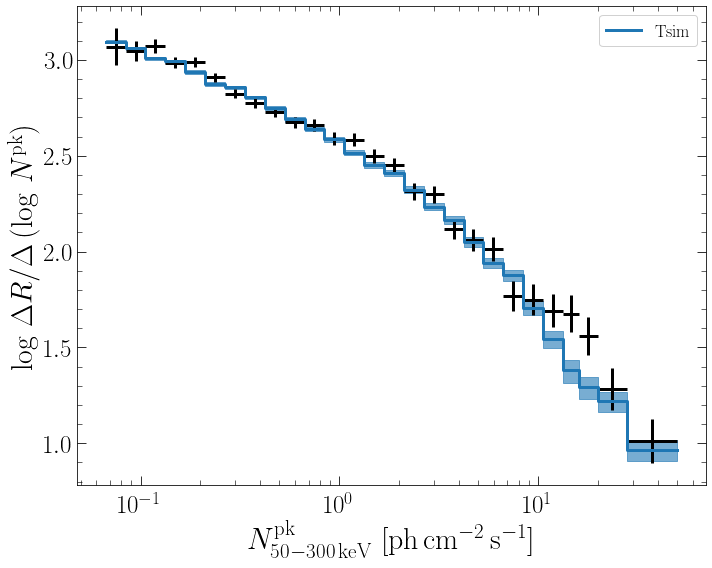

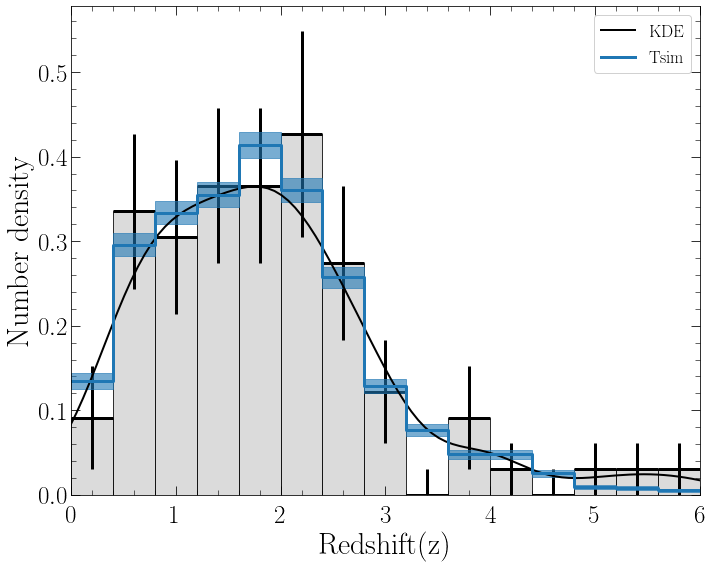

In [10]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(10,8))
pf.plot_intensity_constraint(ax=ax, pop=gp, label='Tsim')
ax.legend()
fig, ax = plt.subplots(figsize=(10,8))
pf.plot_redshift_constraint(ax=ax, pop=gp, label='Tsim')
ax.legend()

KeyError: 'pdet_SHOALS'

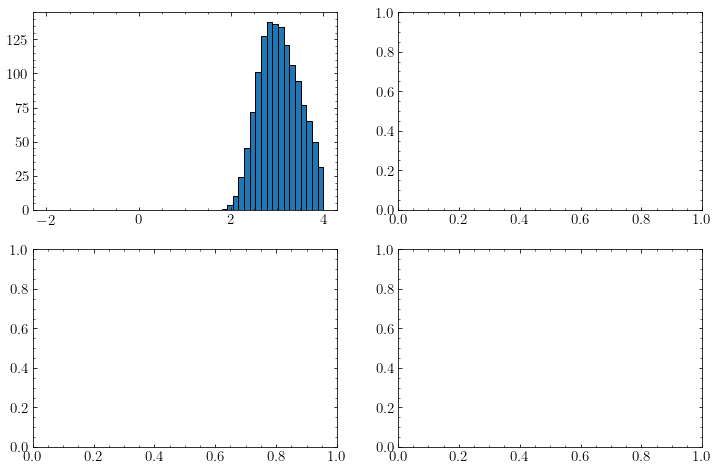

In [6]:
# def plot_ECLAIRs_pop(pop):
pop = gp
fig, axes = plt.subplots(2,2, figsize=(12,8))
df = pop.properties
# pflx distr
axes[0,0].hist(np.log10(df['pht_cts_ECLAIRs']), weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(-2,4, 50))
axes[0,0].hist(np.log10(df['pht_cts_ECLAIRs']), weights=df['pdet_SHOALS'], bins=np.linspace(-2,4, 50), alpha=0.5)
axes[0,0].set_yscale('log')
axes[0,0].set_xlabel('Count rate [cts/s/cm2]')
    
# z distr
axes[0,1].hist(df['z'], weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(0, 15, 50))
axes[0,1].hist(df['z'], weights=df['pdet_SHOALS'], bins=np.linspace(0, 15, 50), alpha=0.5)
axes[0,1].set_xlabel('Redshift (z)')
# axes[0,1].set_yscale('log')

# L distr
axes[1,0].hist(np.log10(df['L']), weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(49, 55, 51))
axes[1,0].hist(np.log10(df['L']), weights=df['pdet_SHOALS'], bins=np.linspace(49, 55, 51), alpha=0.5)
axes[1,0].set_xlabel('log Luminosity [erg/s]')
axes[1,0].set_yscale('log')

# Ep distr
axes[1,1].hist(np.log10(df['Epobs']), weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(0, 4, 51))
axes[1,1].hist(np.log10(df['Epobs']), weights=df['pdet_SHOALS'], bins=np.linspace(0, 4, 51), alpha=0.5)
axes[1,1].set_xlabel('Observed $E_p$ [keV]')
axes[1,1].set_yscale('log')

#     return

In [9]:
df

,z,D_L,L,Ep,alpha,beta,ktild,Epobs,pht_pflx_BATSE,t90,...,erg_flnc_BATSE,erg_flnc_BAT,erg_flnc_ECLAIRs,pdet_Stern,pdet_EpGBM,pdet_eBAT6,pdet_SHOALS,pdet_ECLAIRs_tot,pdet_ECLAIRs_pht_flnc,pdet_ECLAIRs_pht_cts
0,2.170,17401.053714,3.614029e+50,1359.520128,0.860675,2.62545,0.918250,428.870703,0.013940,9.725305,...,1.831008e-08,1.123093e-08,4.114768e-06,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,3.079,26674.280384,1.363275e+51,836.523242,0.631338,3.14171,1.518077,205.080471,0.044846,8.785559,...,6.081942e-08,4.346737e-08,1.583862e-05,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.102,464.577272,7.374763e+49,1990.981125,0.528301,2.86500,1.596361,1806.697936,0.720202,13.665846,...,5.971089e-07,2.423974e-07,8.188913e-05,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1.897,14739.898648,3.543551e+50,2152.396189,0.621347,2.19460,0.601913,742.974176,0.004830,6.245621,...,5.306995e-09,2.541451e-09,8.804933e-07,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,1.403,10129.311984,1.831243e+51,800.897126,0.451198,2.51653,1.394875,333.290523,0.211422,13.743068,...,4.891137e-07,2.640507e-07,9.131275e-05,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.305,29057.256652,1.012078e+51,510.985438,0.667765,2.31065,0.798291,118.695804,0.019168,9.215807,...,2.574960e-08,2.406587e-08,9.267541e-06,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
99996,3.107,26968.073361,4.635448e+50,1534.558289,0.602841,3.18291,1.590126,373.644580,0.009690,15.889507,...,1.450302e-08,8.073213e-09,2.840249e-06,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
99997,3.615,32366.378595,7.944843e+50,2214.639660,0.841180,2.56481,0.901327,479.878583,0.007684,12.330635,...,6.194006e-08,3.668010e-08,1.334548e-05,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
99998,2.541,21117.997938,1.664388e+52,1079.630387,0.655990,3.14171,1.469114,304.894207,0.670358,12.154898,...,1.331976e-06,8.134591e-07,2.910054e-04,1.0,0.0,0.0,0.0,0.319026,0.319026,0.151261


In [7]:
gp.parameters['cosmology']

{'OmegaM': 0.3, 'OmegaL': 0.7, 'h': 0.7}

In [8]:
ECLAIRs_prop

{'eff_area_E': array([  4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
          6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
          8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
         10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,
         12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,
         14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
         16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
         18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
         20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
         22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
         24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25,  25.5 ,  25.75,
         26.  ,  26.25,  26.5 ,  26.75,  27.  ,  27.25,  27.5 ,  27.75,
         28.  ,  28.25,  28.5 ,  28.75,  29.  ,  29.25,  29.5 ,  29.75,
         30.  ,  30.25,  30.5 ,  30.75,  31.  ,  3

In [15]:
cosmo['parameters']['parameters']

{'OmegaM': 0.3, 'OmegaL': 0.7, 'h': 0.7}

In [12]:
L = 10**52 # erg/s
z = 2
Ep = 500 # keV
D_L = Lum_dist(z, cosmo=cosmo)
alpha = 0.6
beta = 2.5
ktild = f90f.f90f.calc_ktild(alpha=alpha, beta=beta)
Emin = 4 # keV
Emax = 120 # keV
eff_area_A_tot = ECLAIRs_prop['eff_area_A']
eff_area_E_tot = ECLAIRs_prop['eff_area_E']
cts = ph.Cts_flux_ECLAIRs(L, z, Ep, D_L, alpha, beta, ktild, Emin, Emax, eff_area_A_tot, eff_area_E_tot,
    precision=100, f90=True)
cts

614.3075387148449